In [872]:
import pandas as pd
import numpy as np

from pandas import Series

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix, 
                            accuracy_score, 
                            precision_score, 
                            recall_score, 
                            f1_score, 
                            roc_auc_score, 
                            roc_curve)

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     KFold,
                                     RepeatedKFold)
import imblearn

import warnings
warnings.filterwarnings("ignore")

In [873]:
data = pd.read_csv('train2.csv')

In [874]:
#Первичный обзор данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [875]:
data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


Видим тут что разные признаки как и предполагалось в разном маштабе и нужно будет обработать и привести к общему 

In [876]:
data.describe(include='object')

,app_date,education,sex,car,car_type,foreign_passport
count,73799,73492,73799,73799,73799,73799
unique,120,5,2,2,2,2
top,18MAR2014,SCH,F,N,N,N
freq,1018,38860,41562,49832,59791,62733


In [877]:
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


<AxesSubplot:>

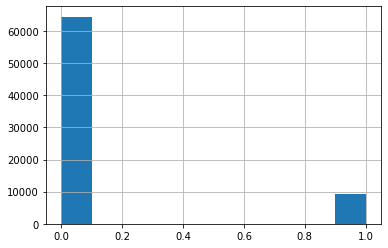

In [878]:
data['default'].hist()

Вывод - целевая несбалансирована. На это нужно обратить внимание при обучении модели - есть риск переобучиться на самый популярный класс.

In [879]:
data.isna().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

<AxesSubplot:>

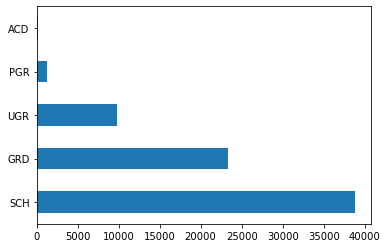

In [880]:
data['education'].value_counts().plot.barh()

Я решила заменить отсутствующие значение на SCH, потому что пропусков очень мало, они никак не будут полезны в кажестве нового признака для модели, скорее всего. На будущее - предложить новый вариант - 'без образования', потому что у нас нет категории под людей без какого-либо образования, и возможно это они.

In [881]:
data['education']=data['education'].fillna('SCH')

In [882]:
#Проверяем что пропусков не осталось
data.isnull().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
dtype: int64

In [883]:
#Проверям уникальность каждого id

data.client_id.value_counts()

2049      1
85187     1
85507     1
83458     1
87552     1
         ..
101156    1
107297    1
109344    1
21279     1
6141      1
Name: client_id, Length: 73799, dtype: int64

In [884]:
#Удаляем столбик с id так как он не несет никакой значимости

data.drop(['client_id'], axis=1, inplace=True)

<AxesSubplot:>

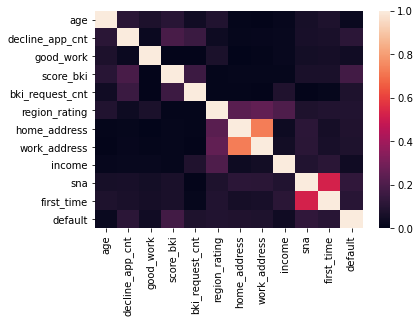

In [885]:
sns.heatmap(data.corr().abs(), vmin=0, vmax=1)

На карте мы видим сильную корреляцию между домашним и рабочем адресами, и между давностю наличия информации о заемщике и связи заемщика с клиентами банка. Предлагаю удалить по одному признаку из пары - домашний адрес и давность наличия информации о заемщике. Обоснование: между домашним и рабочем адресами понятна корреляция и рабочий адрес мне кажется более полезен, на счет второй пары признаков - понятно что если человек давно подал свои данные, у него за это время наберется больше связей с другими льдьми, даже смотря в разрезе возраста, и я решила оставить признак кол-ва связей так, как по ним можно предугадать поведение заемщика, посмотрев на его окружение, или повышается его ответственность перед банком, и каналы воздействия на него. 

In [886]:
data.drop(['home_address'], axis=1, inplace=True)
data.drop(['first_time'], axis=1, inplace=True)

Начинаем обработку каждого признака

In [887]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_date          73799 non-null  object 
 1   education         73799 non-null  object 
 2   sex               73799 non-null  object 
 3   age               73799 non-null  int64  
 4   car               73799 non-null  object 
 5   car_type          73799 non-null  object 
 6   decline_app_cnt   73799 non-null  int64  
 7   good_work         73799 non-null  int64  
 8   score_bki         73799 non-null  float64
 9   bki_request_cnt   73799 non-null  int64  
 10  region_rating     73799 non-null  int64  
 11  work_address      73799 non-null  int64  
 12  income            73799 non-null  int64  
 13  sna               73799 non-null  int64  
 14  foreign_passport  73799 non-null  object 
 15  default           73799 non-null  int64  
dtypes: float64(1), int64(9), object(6)
memor

App_date- дата подачи заявки

In [888]:
data.app_date

0        01FEB2014
1        12MAR2014
2        01FEB2014
3        23JAN2014
4        18APR2014
           ...    
73794    04MAR2014
73795    24MAR2014
73796    22APR2014
73797    04JAN2014
73798    23JAN2014
Name: app_date, Length: 73799, dtype: object

In [889]:
# Переведем эту колонку в приемлемый формат

data.app_date = pd.to_datetime(data.app_date)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

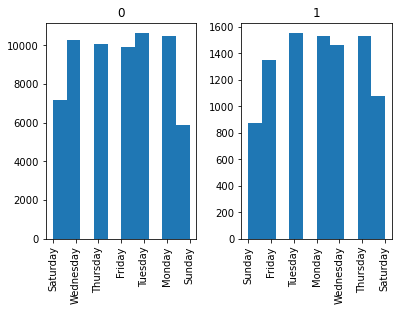

In [890]:
# Посмотрим на распределение подач заявлений по дням недели:
data.app_date.dt.day_name().hist(by=data.default)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

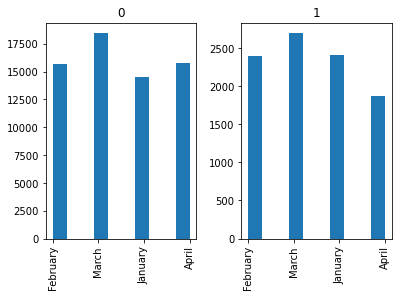

In [891]:
data.app_date.dt.month_name().hist(by=data.default)

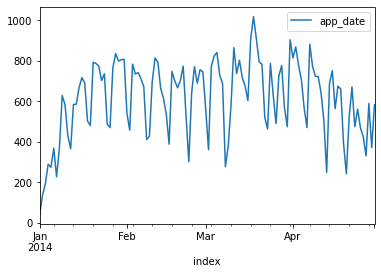

In [892]:
# Посмотрим на то, как часто подавали заявки в каждый день:

data.app_date.value_counts().to_frame().reset_index().sort_values(by=['index']).plot.line(x='index', y='app_date');

Видим, что есть какой-то ритм у графика, возможно кол-во заявок падает в выходные дни

<AxesSubplot:xlabel='app_date'>

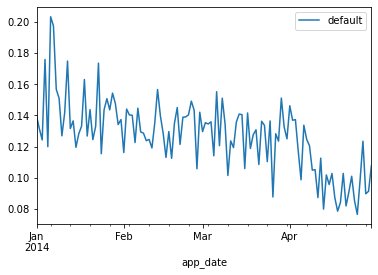

In [893]:
# Посмотрим на долю дефолтов в конкретный день:

data.groupby(data.app_date)['default'].mean().to_frame().reset_index().sort_values(by=['app_date']).plot.line(x='app_date', y='default')

In [894]:
data['app_date_year'] = data.app_date.dt.year
data['app_date_month'] = data.app_date.dt.month
data['app_date_day'] = data.app_date.dt.day
data['app_date_weekday'] = data.app_date.dt.weekday
data['app_date_season'] = data.app_date_month.apply(lambda x: 1 if x in [12,1,2] 
                                                    else 2 if x in [3,4,5] 
                                                    else 3 if x in [6,7,7] 
                                                    else 4)
data = data.drop('app_date',axis=1)

In [895]:
data['app_date_quarter_month'] = data['app_date_day'].apply(lambda x: 1 if x in [1,2,3,4,5,6,7] 
                                                            else 2 if x in [8,9,10,11,12,13,14,15] 
                                                            else 3 if x in [16,17,18,19,20,21,22,23] 
                                                            else 4)

<AxesSubplot:xlabel='default', ylabel='count'>

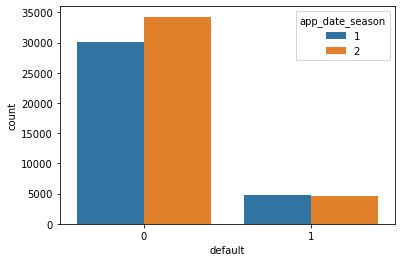

In [896]:
sns.countplot(x=data['default'],hue=data['app_date_season'], data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

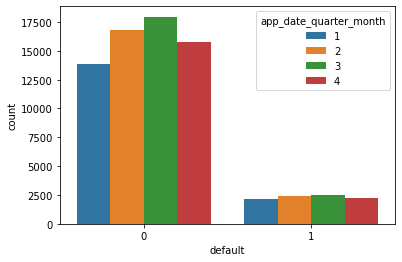

In [897]:
sns.countplot(x=data['default'],hue=data['app_date_quarter_month'], data=data)

Я не увидела какой-то интересной зависимости в этом признаке, только то, что в апреле стало меньше дефолтов кажется. Принимаю решение оставить только месяц и четверть месяца, и применить к ним get_dummies, что бы не учитывались номера как веса. Так же удалю одну из колонок, чтобы избежать мультиколлинеарности. Так же хочу отметить, что у нас в данных только 4 месяца, то есть в дальнейшем применении нужно будет этот признак не учитывать, или собрать данные за год и построить модель на новых полных данных. Как и проработать колонку с образованием - добавить варинт без образования. И удаляю уже ненужные признаки

In [898]:
data = pd.get_dummies(data, columns=['app_date_month'], drop_first=True)
data = pd.get_dummies(data, columns=['app_date_quarter_month'], drop_first=True)

In [899]:
data = data.drop('app_date_year',axis=1)
data = data.drop('app_date_day',axis=1)
data = data.drop('app_date_weekday',axis=1)
data = data.drop('app_date_season',axis=1)

Education - уровень образования

Я уже поработала с этим признаком выше и готова принять решение преобразовать его в дамми переменные.

In [900]:
data = pd.get_dummies(data, columns=['education'])

In [901]:
data = data.drop('education_SCH',axis=1)

Sex - пол заемщика

<AxesSubplot:xlabel='default', ylabel='count'>

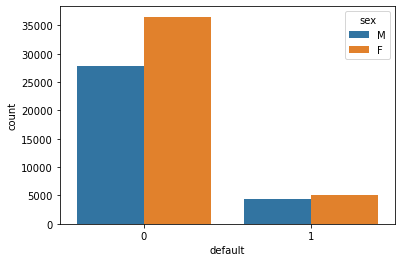

In [902]:
sns.countplot(x=data['default'],hue=data['sex'], data=data)

В целом видно, что относительно женщин, мужчины реже берут кредит, но и мужчины и женщины больше возвращают кредит, чем не закрывают долг. Так как это бинарный признак применим label_encoder

In [903]:
label_encoder = LabelEncoder()

data['sex'] = label_encoder.fit_transform(data['sex'])

Age - возраст заемщика

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

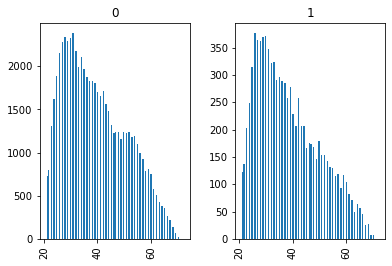

In [904]:
data.age.hist(by=data.default, bins=100)

Признак числовой, распределение нормальное, не вижу повода стандартизировать

In [905]:
life= []
for i in range(15,101):
         life.append(i)


In [906]:
data['years_of_age'] = data.age.apply(lambda x: 1 if x in life[1:11]
                                                 else 2 if x in life[11:21] 
                                                 else 3 if x in life[21:31] 
                                                 else 4 if x in life[31:41] 
                                                 else 5 if x in life[41:51] 
                                                 else 6 if x in life[51:81] 
                                                 else 7)


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

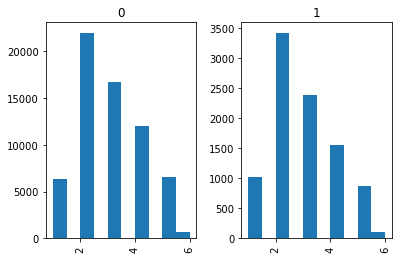

In [907]:
data['years_of_age'].hist(by=data.default, bins=10)

In [908]:
data.groupby(data.years_of_age)['default'].mean()

years_of_age
1    0.139349
2    0.134547
3    0.124347
4    0.114393
5    0.118037
6    0.133333
Name: default, dtype: float64

In [909]:
data.years_of_age.value_counts()

2    25426
3    19156
4    13611
5     7396
1     7370
6      840
Name: years_of_age, dtype: int64

Не могу закрыть глаза на хоть и маленькую, но все равно отличительность группы возраста 4 и 5, а это 46-65 лет, и кажется логичным что самые молодые заемщики и пожилые люди менее кридитоспособные, поэтому принимаю решение сделать это категориальным признаком и преобразовать его в дамми переменные.

In [910]:
data['years_of_age'] = data['years_of_age'].apply(lambda x: '16-25' if x==1 
                                                   else '26-35' if x==2 
                                                   else '36-45' if x==3
                                                   else '46-55' if x==4
                                                   else '55-65' if x==5
                                                   else '66-95' if x==6
                                                   else '1-15,95-100')

In [911]:
data['years_of_age'].value_counts()

26-35    25426
36-45    19156
46-55    13611
55-65     7396
16-25     7370
66-95      840
Name: years_of_age, dtype: int64

In [912]:
data = pd.get_dummies(data, columns=['years_of_age'], drop_first=True)
data = data.drop('age',axis=1)

Car - флаг наличия автомобиля и 
Car_type - флаг автомобиля иномарки

<AxesSubplot:xlabel='default', ylabel='count'>

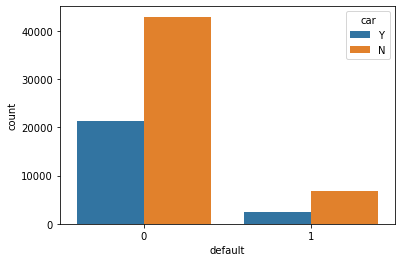

In [913]:
sns.countplot(x=data['default'],hue=data['car'], data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

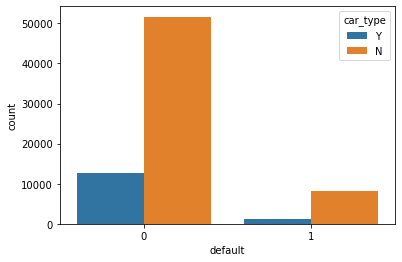

In [914]:
sns.countplot(x=data['default'],hue=data['car_type'], data=data)

Видно, что люди имеющие машины реже имеют и дефолт по кредиту, а те у кого иномарка - еще реже. Признак бинарный - применяем label_encoder

In [915]:
data['car'] = label_encoder.fit_transform(data['car'])
data['car_type'] = label_encoder.fit_transform(data['car_type'])

Decline_app_cnt - количество отказанных прошлых заявок

In [916]:
data.decline_app_cnt.value_counts()

0     61214
1      8397
2      2468
3       903
4       414
5       165
6       113
7        48
9        24
8        19
10       11
11        9
13        3
12        2
14        2
16        2
15        1
19        1
22        1
24        1
33        1
Name: decline_app_cnt, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

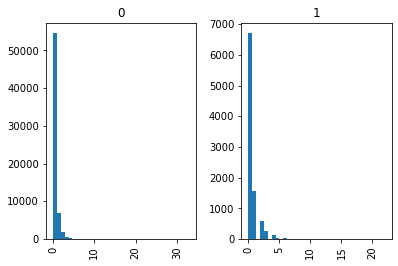

In [917]:
data.decline_app_cnt.hist(by=data.default, bins=35)

In [918]:
data.groupby(data.decline_app_cnt)['default'].mean()

decline_app_cnt
0     0.109534
1     0.187805
2     0.243517
3     0.273533
4     0.289855
5     0.260606
6     0.300885
7     0.291667
8     0.526316
9     0.375000
10    0.454545
11    0.333333
12    0.000000
13    0.000000
14    0.500000
15    1.000000
16    0.000000
19    1.000000
22    1.000000
24    0.000000
33    0.000000
Name: default, dtype: float64

Видно, что чем больше было отказов, тем больше дефолтов в среднем. Сделаю признак катогориальным и преобразую в дамми переменные!

In [919]:
data['decline_app_cnt'] = data['decline_app_cnt'].apply(lambda x: '0' if x==0 
                                                        else '1-10' if x in range(1,11) 
                                                        else '11-20' if x in range(11,21) 
                                                        else '21_and_more')

In [920]:
data['decline_app_cnt'].value_counts()

0              61214
1-10           12562
11-20             20
21_and_more        3
Name: decline_app_cnt, dtype: int64

In [921]:
data = pd.get_dummies(data, columns=['decline_app_cnt'], drop_first=True)

Good_work - флаг наличия “хорошей” работы

<AxesSubplot:xlabel='default', ylabel='count'>

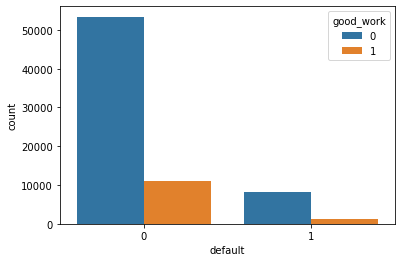

In [922]:
sns.countplot(x=data['default'],hue=data['good_work'], data=data)

Тут мы видим, что среди тех, кто не вернул кредит, большенство не имеет хорошей работы. Признак бинарный, оставляем его в таком виде.

Score_bki - скоринговый балл по данным из БКИ

In [923]:
data.score_bki.value_counts()

-1.775263    352
-2.225004    296
-2.104211    288
-2.169664    258
-1.920823    185
            ... 
-1.400832      1
-1.824425      1
-2.081890      1
-2.216073      1
-2.296371      1
Name: score_bki, Length: 69096, dtype: int64

<AxesSubplot:>

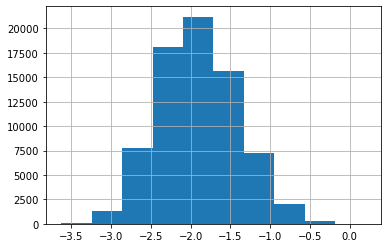

In [924]:
data.score_bki.hist()

In [925]:
def outliers(column):  # подсчет количества выбросов
    Q1 = column.quantile(0.25)
    Q2 = column.quantile(0.75)
    IQR = Q2 - Q1
    left = Q1 - 1.5 * IQR
    right = Q2 + 1.5 * IQR
    return (column < left).sum() + (column > right).sum(), left, right

outliers(data.score_bki)

(351, -3.2940876975, -0.5352773974999998)

In [926]:
outliers(data.score_bki)[0]/ data.shape[0] *100

0.47561620076152794

Распределение нормальное, выбросов мало и мне кажется это не те выбросы, которые нужно удалять. Оставлю как числовой признак.

Bki_request_cnt - количество запросов в БКИ

<AxesSubplot:>

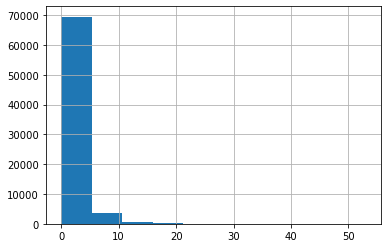

In [927]:
data.bki_request_cnt.hist()

In [928]:
outliers(data.bki_request_cnt)

(1755, -4.5, 7.5)

In [929]:
outliers(data.bki_request_cnt)[0]/ data.shape[0] *100

2.3780810038076394

Признак плохо распределен, попробую пролагорифмировать и проверить распределение еще раз

<AxesSubplot:>

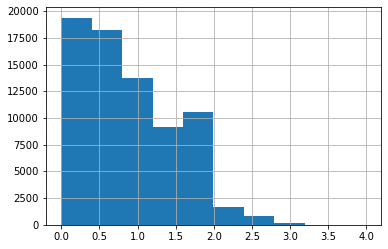

In [930]:
np.log(data['bki_request_cnt'] + 1).hist()

In [931]:
#Распределение улучшилось, оставлю так  

data['bki_request_cnt'] = np.log(data['bki_request_cnt'] + 1)

In [932]:
outliers(data.bki_request_cnt)

(9, -2.0794415416798357, 3.465735902799726)

In [933]:
outliers(data.bki_request_cnt)[0]/ data.shape[0] *100

0.012195287199013537

Признак оставим как числовой

Region_rating - рейтинг региона

<AxesSubplot:>

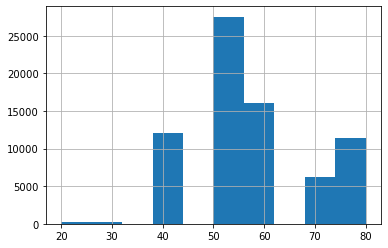

In [934]:
data.region_rating.hist()

In [935]:
data.region_rating.value_counts()

50    27523
60    16075
40    12027
80    11469
70     6199
30      300
20      206
Name: region_rating, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

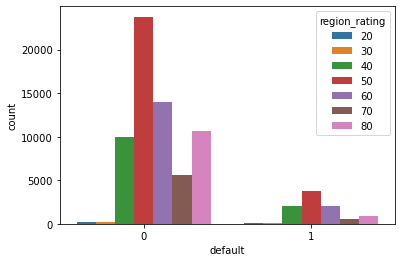

In [936]:
sns.countplot(x = data['default'], hue= data['region_rating'], data = data)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

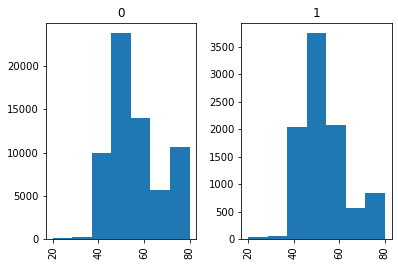

In [937]:
data.region_rating.hist(by=data.default, bins=7)

Кажется, что чем ниже рейтинг, тем выше дефолтность, и наоборот. Это и логично. Признак больше категориальный и я преобразую его в дамми переменную. На будущее - нужно узнать все возможные рейтинги и переобучить на них модель.

In [938]:
data = pd.get_dummies(data, columns=['region_rating'], drop_first=True)

Work_address - категоризатор рабочего адреса

In [939]:
data.work_address.value_counts()

3    44959
2    20506
1     8334
Name: work_address, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

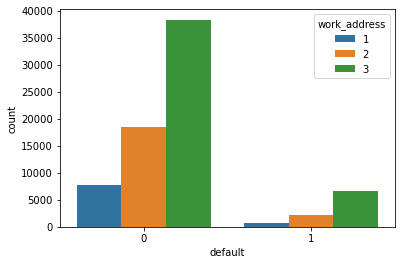

In [940]:
sns.countplot(x = data['default'], hue= data['work_address'], data = data)

Категориальный признак преобразую в дамми переменную

In [941]:
data = pd.get_dummies(data, columns=['work_address'], drop_first=True)

Income - доход заемщика

<AxesSubplot:>

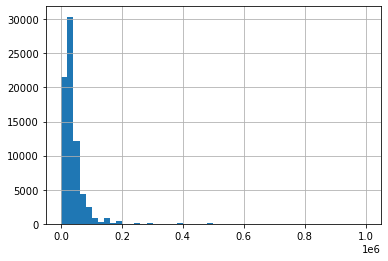

In [942]:
data.income.hist(bins=50)

In [943]:
outliers(data.income)

(4695, -22000.0, 90000.0)

In [944]:
outliers(data.income)[0]/ data.shape[0] *100

6.361874822152061

<AxesSubplot:>

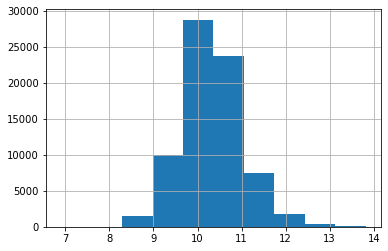

In [945]:
np.log(data['income'] + 1).hist()

In [946]:
data['income'] = np.log(data['income'] + 1)

In [947]:
outliers(data.income)

(1767, 8.590378193705899, 12.092136480586621)

In [948]:
outliers(data.income)[0]/ data.shape[0] *100

2.394341386739658

Логарифмирование сильно улучшило распределение. Выбросы решила оставить, так как их немного и возможно логично, что экстримально мало людей с большим доходом обращаются за кредитом. Оставлю признак числовым. На будущее - можно попробовать разделить на уровни дохода и сделать признак категориальным.

Sna - связь заемщика с клиентами банка

<AxesSubplot:xlabel='default', ylabel='count'>

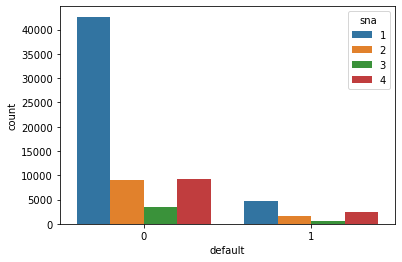

In [949]:
sns.countplot(x = data['default'], hue= data['sna'], data = data)

Категориальный признак преобразую в дамми переменную

In [950]:
data = pd.get_dummies(data, columns=['sna'], drop_first=True)

Foreign_passport - наличие загранпаспорта

<AxesSubplot:xlabel='default', ylabel='count'>

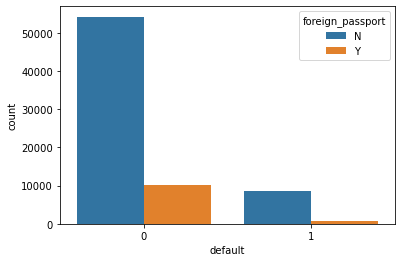

In [951]:
sns.countplot(x = data['default'], hue= data['foreign_passport'], data = data)

Бинарный признак - применим label_encoder

In [952]:
data['foreign_passport'] = label_encoder.fit_transform(data['foreign_passport'])

Посмотрим на важность признаков:

In [953]:
num_cols=['score_bki', 'bki_request_cnt', 'income']

<AxesSubplot:>

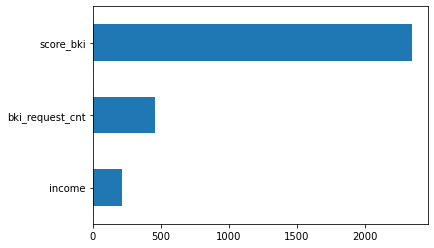

In [954]:
imp_num = pd.Series(f_classif(data[num_cols], data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [955]:
data.columns

Index(['sex', 'car', 'car_type', 'good_work', 'score_bki', 'bki_request_cnt',
       'income', 'foreign_passport', 'default', 'app_date_month_2',
       'app_date_month_3', 'app_date_month_4', 'app_date_quarter_month_2',
       'app_date_quarter_month_3', 'app_date_quarter_month_4', 'education_ACD',
       'education_GRD', 'education_PGR', 'education_UGR', 'years_of_age_26-35',
       'years_of_age_36-45', 'years_of_age_46-55', 'years_of_age_55-65',
       'years_of_age_66-95', 'decline_app_cnt_1-10', 'decline_app_cnt_11-20',
       'decline_app_cnt_21_and_more', 'region_rating_30', 'region_rating_40',
       'region_rating_50', 'region_rating_60', 'region_rating_70',
       'region_rating_80', 'work_address_2', 'work_address_3', 'sna_2',
       'sna_3', 'sna_4'],
      dtype='object')

In [956]:
bin_cols=['sex', 'car', 'car_type', 'good_work', 'foreign_passport', 'app_date_month_2',
       'app_date_month_3', 'app_date_month_4', 'app_date_quarter_month_2',
       'app_date_quarter_month_3', 'app_date_quarter_month_4', 'education_ACD',
       'education_GRD', 'education_PGR', 'education_UGR',
       'years_of_age_26-35', 'years_of_age_36-45', 'years_of_age_46-55',
       'years_of_age_55-65', 'years_of_age_66-95', 'decline_app_cnt_1-10',
       'decline_app_cnt_11-20', 'decline_app_cnt_21_and_more',
       'region_rating_30', 'region_rating_40', 'region_rating_50',
       'region_rating_60', 'region_rating_70', 'region_rating_80',
       'work_address_2', 'work_address_3', 'sna_2', 'sna_3', 'sna_4']

<AxesSubplot:>

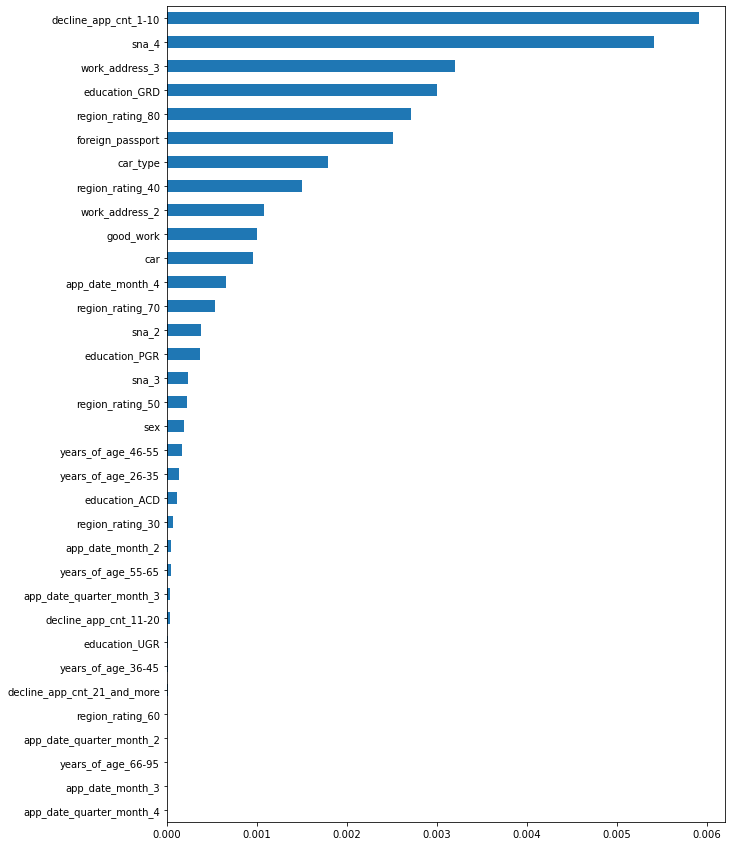

In [957]:
imp_bin = Series(mutual_info_classif(data[bin_cols], data['default'],
                                     discrete_features =True), index = bin_cols)
imp_bin.sort_values(inplace = True)
imp_bin.plot(kind = 'barh', figsize=(10, 15))

Видим, что самый важный признак - score_bki, с большим отрывом. На заметку - можно будет потом попробовать построить модель только на важных признаках. И проверить какие признаки считает неважными L1. 

<AxesSubplot:>

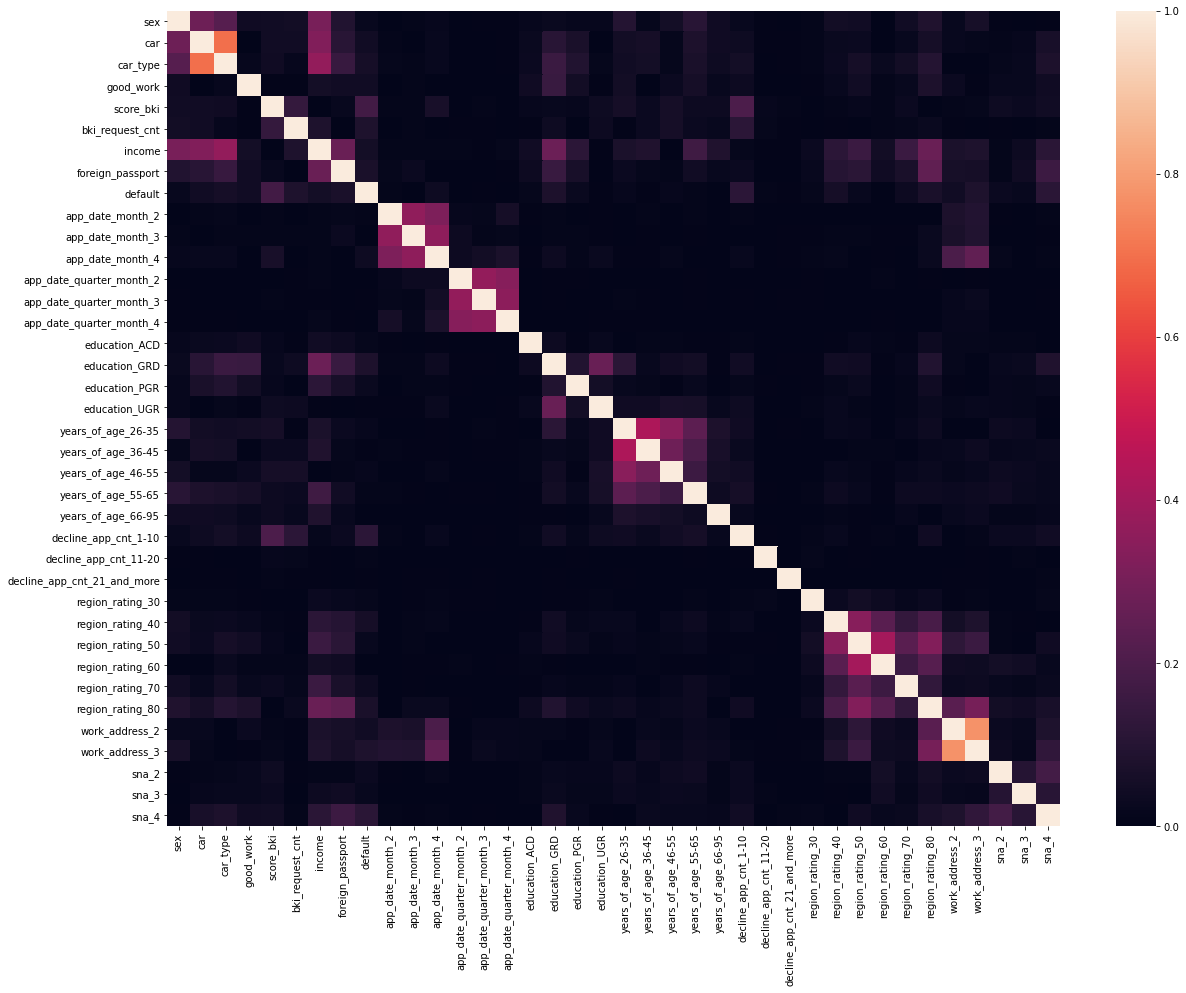

In [958]:
plt.subplots(figsize=(20,15))

sns.heatmap(data.corr().abs(), vmin=0, vmax=1)

Видим какие-то непредвиденные и не очень корреляции. Решаю удалить признаки, которые в паре имеют меньше важности.

In [959]:
data.drop(['car'], axis=1, inplace=True)
data.drop(['work_address_2'], axis=1, inplace=True)

Метрики

In [960]:
def count_metrics(y_val, y_pred, y_probs):    
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_val, y_pred)
    metrics['precision'] = precision_score(y_val, 1 - y_pred)
    metrics['recall'] = recall_score(y_val, 1 - y_pred)
    metrics['f1'] = f1_score(y_val, y_pred)
    metrics['roc_auc'] = roc_auc_score(y_val, y_probs)  
    metrics['confusion'] = confusion_matrix(y_val, y_pred)
    return metrics 

def show_roc_auc(y_val, y_probs):
    fpr, tpr, threshold = roc_curve(y_val, y_probs)
    roc_auc = roc_auc_score(y_val, y_probs)
    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

Обучение

In [961]:
X = data.drop(columns=['default'])
Y = data['default']

In [962]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=42)

In [963]:
print(f'В тренировочном датасете такая пропорция классов {np.unique(y_train, return_counts=True)[1] / y_train.shape[0]}')

В тренировочном датасете такая пропорция классов [0.87220312 0.12779688]


Нормализация данных

In [964]:
def do_std_scale(train, test, column):
    scaler = StandardScaler()
    train[column] = scaler.fit_transform(train[[column]])
    test[column] = scaler.transform(test[[column]])
    
    return train, test

In [965]:
for col in num_cols:
    X_train, X_val = do_std_scale(X_train, X_val, col)

Наивная модель

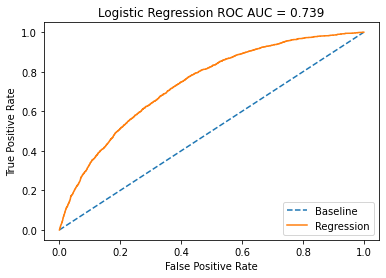

,naive
accuracy,0.875271
precision,0.121898
recall,0.978654
f1,0.040646
roc_auc,0.738554
confusion,"[[12880, 53], [1788, 39]]"


In [966]:
model_naive = LogisticRegression()
model_naive.fit(X_train, y_train)
y_pred = model_naive.predict(X_val)
y_probs = model_naive.predict_proba(X_val)[:,1]

metrics_naive = count_metrics(y_val, y_pred, y_probs)
data_metrics = pd.DataFrame.from_dict(metrics_naive, orient='index',columns = ['naive'])

show_roc_auc(y_val, y_probs)
display(data_metrics)

Видим, что модель хорошо предсказывает дефолт, даже подозрительно хорошо, а хороших заемщиков - хуже, то есть мы упускаем деньги. Нужно попробовать сбалансировать выборку. Решаю сделать первоначально оверсемплинг - не хочу потерять данные.

In [967]:
oversample_ups = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.8, random_state=42)
X_train_oversempl, y_train_oversempl = oversample_ups.fit_resample(X_train, y_train)

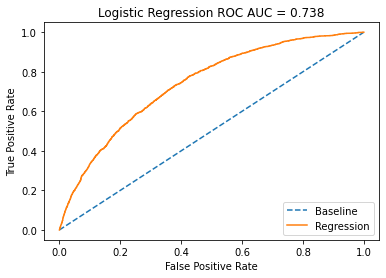

,over_sampling
accuracy,0.732182
precision,0.073437
recall,0.423098
f1,0.347797
roc_auc,0.738384
confusion,"[[9753, 3180], [773, 1054]]"


In [968]:
log_reg = LogisticRegression()
log_reg.fit(X_train_oversempl, y_train_oversempl)
y_pred_oversempl = log_reg.predict(X_val)
y_probs_oversempl = log_reg.predict_proba(X_val)[:,1]

metrics_oversempl = count_metrics(y_val, y_pred_oversempl, y_probs_oversempl)
data_metrics_oversempl = pd.DataFrame.from_dict(metrics_oversempl, orient='index',columns = ['over_sampling'])

show_roc_auc(y_val, y_probs_oversempl)
display(data_metrics_oversempl)

Все таки попробуем убрать часть данных

In [969]:
undersample_ups = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1, random_state=42)
X_train_undersempl, y_train_undersempl = undersample_ups.fit_resample(X_train, y_train)

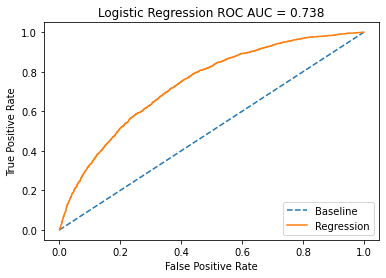

,under_sampling
accuracy,0.663753
precision,0.063527
recall,0.31746
f1,0.334451
roc_auc,0.738027
confusion,"[[8550, 4383], [580, 1247]]"


In [970]:
log_reg_undersempl = LogisticRegression()
log_reg_undersempl.fit(X_train_undersempl, y_train_undersempl)
y_pred_undersempl = log_reg_undersempl.predict(X_val)
y_probs_undersempl = log_reg_undersempl.predict_proba(X_val)[:,1]

metrics_undersempl = count_metrics(y_val, y_pred_undersempl, y_probs_undersempl)
data_metrics_undersempl = pd.DataFrame.from_dict(metrics_undersempl, orient='index',columns = ['under_sampling'])

show_roc_auc(y_val, y_probs_undersempl)
display(data_metrics_undersempl)

Видим, что общая точность и полнота модели упали, но! Мы стали лучше угадывать хороших клиентов и f1 улучшилось. Попробуем подобрать лучшие параметры для обучения, с помощью гиперпараметров

In [971]:
penalty= ['l2']
C= np.logspace(0, 4, 10)
class_weight= ['balanced', {0: 1, 1: 10}]

In [972]:
hyperparameters = dict(C=C, penalty=penalty, class_weight=class_weight)

In [973]:
repeated_cv = RepeatedKFold(n_repeats=2, random_state=42) # добавляю RepeatedKFold для того, 
                                                          # чтобы уменьшить вероятность сильного дисбаланса классов

In [856]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

gs = GridSearchCV(log_reg, param_grid=hyperparameters, cv=repeated_cv, scoring='roc_auc')

In [857]:
gs.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'class_weight': ['balanced', {0: 1, 1: 10}],
                         'penalty': ['l2']},
             scoring='roc_auc')

In [858]:
gs.best_params_

{'C': 1291.5496650148827, 'class_weight': 'balanced', 'penalty': 'l2'}

In [859]:
probs = gs.predict_proba(X_val)
preds = gs.predict(X_val)

# Смотрим наши две главные метрики
print('ROC AUC', roc_auc_score(y_val, probs[:, 1]))
print('Confusion matrix: \n', confusion_matrix(y_val, preds))

ROC AUC 0.7382108818930423
Confusion matrix: 
 [[8633 4300]
 [ 592 1235]]


Попробуем подобрать параметры, используя еще и L1 регуляризацию и поэтому выбираем другой алгоритм - liblinear.

In [860]:
penalty_all_reg= ['l1','l2']
hyperparameters_all_reg = dict(C=C, penalty=penalty_all_reg, class_weight=class_weight)

log_reg_all_reg = LogisticRegression(solver = 'liblinear')
log_reg_all_reg.fit(X_train, y_train)

gs_all_reg = GridSearchCV(log_reg_all_reg, param_grid=hyperparameters_all_reg, cv=repeated_cv, scoring='roc_auc')
gs_all_reg.fit(X_train, y_train)
gs_all_reg.best_params_

{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1'}

In [861]:
probs_all_reg = gs_all_reg.predict_proba(X_val)
preds_all_reg = gs_all_reg.predict(X_val)
print('ROC AUC', roc_auc_score(y_val, probs_all_reg[:, 1]))
print('Confusion matrix: \n', confusion_matrix(y_val, preds_all_reg))

ROC AUC 0.7383562989430899
Confusion matrix: 
 [[8637 4296]
 [ 590 1237]]


В целом данные уже сильно не меняются. Решаю оставить последний вариант и обучить модель с этими параметрами. Но на всякий случай еще хочу попробовать DecisionTreeClassifier, который мы мельком успели пощупать в теоретической части модулей. 

In [977]:
from sklearn.tree import DecisionTreeClassifier

In [978]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [979]:
y_pred_dtc = clf.predict(X_val)
y_probs_dtc = clf.predict_proba(X_val)[:,1]

In [980]:
print('ROC AUC', roc_auc_score(y_val, y_probs_dtc))
print('Confusion matrix: \n', confusion_matrix(y_val, y_pred_dtc))

ROC AUC 0.5417088983426901
Confusion matrix: 
 [[11152  1781]
 [ 1423   404]]


Пока что - это худший результат. Оставляем как есть

In [974]:
finish_model = LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver = 'liblinear')
finish_model.fit(X_train, y_train)

y_pred_finish = finish_model.predict(X_val)
y_probs_finish = finish_model.predict_proba(X_val)[:,1]

In [975]:
print('ROC AUC', roc_auc_score(y_val, y_probs_finish))
print('Confusion matrix: \n', confusion_matrix(y_val, y_pred_finish))

ROC AUC 0.7383562142998709
Confusion matrix: 
 [[8637 4296]
 [ 590 1237]]


В целом нам удалось повысить угадываемость недефолтных заемщиков на такой же уровень, как и дефолтных, не угадываем в примерно 30% случаев. Есть к чему стремиться!

Подгружаем наш тестовый датасет

In [998]:
test=pd.read_csv('test.csv')

Делаем все такие же маневры с признаками, как для тренировочного.

In [999]:
test.drop(['home_address'], axis=1, inplace=True)

test.drop(['first_time'], axis=1, inplace=True)

test.app_date = pd.to_datetime(test.app_date)
test['app_date_year'] = test.app_date.dt.year
test['app_date_month'] = test.app_date.dt.month
test['app_date_day'] = test.app_date.dt.day
test['app_date_weekday'] = test.app_date.dt.weekday
test['app_date_season'] = test.app_date_month.apply(lambda x: 1 if x in [12,1,2] 
                                                    else 2 if x in [3,4,5] 
                                                    else 3 if x in [6,7,7] 
                                                    else 4)

test = test.drop('app_date',axis=1)
test['app_date_quarter_month'] = test['app_date_day'].apply(lambda x: 1 if x in [1,2,3,4,5,6,7] 
                                                            else 2 if x in [8,9,10,11,12,13,14,15] 
                                                            else 3 if x in [16,17,18,19,20,21,22,23] 
                                                            else 4)

test = pd.get_dummies(test, columns=['app_date_month'], drop_first=True)
test = pd.get_dummies(test, columns=['app_date_quarter_month'], drop_first=True)
test = test.drop('app_date_year',axis=1)
test = test.drop('app_date_day',axis=1)
test = test.drop('app_date_weekday',axis=1)
test = test.drop('app_date_season',axis=1)

test['education']=test['education'].fillna('SCH')
test = pd.get_dummies(test, columns=['education'])
test = test.drop('education_SCH',axis=1)

test['sex'] = label_encoder.fit_transform(test['sex'])

test['years_of_age'] = test.age.apply(lambda x: 1 if x in life[1:11]
                                                 else 2 if x in life[11:21] 
                                                 else 3 if x in life[21:31] 
                                                 else 4 if x in life[31:41] 
                                                 else 5 if x in life[41:51] 
                                                 else 6 if x in life[51:81] 
                                                 else 7)

test['years_of_age'] = test['years_of_age'].apply(lambda x: '16-25' if x==1 
                                                   else '26-35' if x==2 
                                                   else '36-45' if x==3
                                                   else '46-55' if x==4
                                                   else '55-65' if x==5
                                                   else '66-95' if x==6
                                                   else '1-15,95-100')

test = pd.get_dummies(test, columns=['years_of_age'], drop_first=True)
test = test.drop('age',axis=1)

test['car'] = label_encoder.fit_transform(test['car'])

test['car_type'] = label_encoder.fit_transform(test['car_type'])

test['decline_app_cnt'] = test['decline_app_cnt'].apply(lambda x: '0' if x==0 
                                                        else '1-10' if x in range(1,11) 
                                                        else '11-20' if x in range(11,21) 
                                                        else '21_and_more')

test = pd.get_dummies(test, columns=['decline_app_cnt'], drop_first=True)

test['bki_request_cnt'] = np.log(test['bki_request_cnt'] + 1)

test = pd.get_dummies(test, columns=['region_rating'], drop_first=True)

test = pd.get_dummies(test, columns=['work_address'], drop_first=True)

test['income'] = np.log(test['income'] + 1)

test = pd.get_dummies(test, columns=['sna'], drop_first=True)

test['foreign_passport'] = label_encoder.fit_transform(test['foreign_passport'])

test.drop(['car'], axis=1, inplace=True)
test.drop(['work_address_2'], axis=1, inplace=True)

In [1000]:
for col in num_cols:
    data, test = do_std_scale(data, test, col)

In [1001]:
finish_model.fit(X, Y)

X_test_finish=test.drop(columns=['client_id'])

y_pred_test = finish_model.predict(X_test_finish)
y_probs_test = finish_model.predict_proba(X_test_finish)[:,1]

test['default'] = y_probs_test

In [1002]:
submission = test[['client_id','default']]

In [1003]:
submission.head()

,client_id,default
0,74835,0.229950
1,17527,0.749189
2,75683,0.286370
3,26883,0.373101
4,28862,0.134742


In [1004]:
submission.to_csv('submission.csv', index=False)

Что можно сделать еще, кроме тех заметок, которые я оставляла по ходу написания кода:

1)Сделать полименальные признаки

2)Добавить признаки из открытого доступа

3)Удалить неважные признаки и на только их основе построить модель, или на только самых важных

4)Попробовать не оверсемплинг, а генерация новых данных на основе существующих 

5)Попробовать другие виды модели обучения

6)Перебирать гиперпараметры

7) Попробовать другую нормализацию данных

8) Проверить на переобучение модель